主成分分析（Principal Component Analysis，PCA）是一种多变量统计方法，它是最常用的降维方法之一，通过正交变换将一组可能存在相关性的变量数据转换为一组线性不相关的变量，转换后的变量被称为主成分。

可以使用两种方法进行 PCA，分别是特征分解或奇异值分解（SVD）。

[PCA （主成分分析）详解 （写给初学者）](https://blog.csdn.net/a8039974/article/details/81285238)  
[主成分分析（PCA）原理详解](https://blog.csdn.net/program_developer/article/details/80632779)

# 先从协方差说起

协方差$$cov(X,Y)=\frac{\sum_{i=1}^n{(X_i-\bar{X})(Y_i-\bar{Y})}}{n-1}$$

协方差其意义：
度量各个维度偏离其均值的程度。协方差的值如果为正值，则说明两者是正相关的(从协方差可以引出“相关系数”的定义)，结果为负值就说明负相关的，如果为0，也是就是统计上说的“相互独立”。



协方差矩阵：  
$$C = \begin{pmatrix}
    cov(x,x) &cov(x,y)  & cov(x,z) \\
   cov(y,x)  & cov(y,y) &  cov(y,z) \\
   cov(z,x)  & cov(z,y) &cov(z,z)   \\
\end{pmatrix}\qquad$$  
从协方差矩阵上，可以得到变量之间两两的相关性

In [1]:
import numpy as np
#设置一下np的输出格式
np.set_printoptions(threshold=100,precision= 4,suppress=True)


In [2]:
# 计算以下数据的协方差矩阵
import numpy as np
np.random.seed(0)
data = np.random.uniform(1,10,(10,2))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(10,1))
data



array([[5.9393, 4.8841],
       [6.4249, 4.4091],
       [4.8129, 2.2524],
       [4.9383, 3.5913],
       [9.673 , 3.3096],
       [8.1255, 4.6224],
       [6.1124, 1.6296],
       [1.6393, 2.5983],
       [1.182 , 0.6784],
       [8.0034, 3.6604]])

必须去中心化

In [3]:
data_norm = data-data.mean(axis = 0)
data_norm

array([[ 0.2542,  1.7206],
       [ 0.7398,  1.2455],
       [-0.8722, -0.9112],
       [-0.7468,  0.4277],
       [ 3.9879,  0.146 ],
       [ 2.4404,  1.4589],
       [ 0.4273, -1.5339],
       [-4.0458, -0.5652],
       [-4.5031, -2.4852],
       [ 2.3183,  0.4968]])

In [4]:
X = data_norm[:,0]
Y = data_norm[:,1]
X,Y

(array([ 0.2542,  0.7398, -0.8722, -0.7468,  3.9879,  2.4404,  0.4273,
        -4.0458, -4.5031,  2.3183]),
 array([ 1.7206,  1.2455, -0.9112,  0.4277,  0.146 ,  1.4589, -1.5339,
        -0.5652, -2.4852,  0.4968]))

In [5]:
# 定义一个函数，输入X，Y能得到X，Y之间的协方差
def getcov(X,Y):

    covxy = ((X-X.mean())*(Y-Y.mean())).sum()/(len(X)-1)

    return covxy

In [6]:
getcov(X,X)

7.332530886964573

numpy自带了协方差矩阵的计算方法，验证一下

In [7]:
C = np.cov(data_norm.T)
C

array([[7.3325, 2.2168],
       [2.2168, 1.8633]])

# 计算协方差矩阵的特征向量和特征值

由矩阵特征值特征向量的定义：
$$Cv=\lambda v$$
其中，$λ$是特征向量$v$对应的特征值，一个矩阵的一组特征向量是一组正交向量。

特征值分解矩阵

对于矩阵$C$，有一组特征向量$V$，将这组向量进行正交化单位化，就能得到一组正交单位向量。特征值分解，就是将矩阵$C$分解为如下式：

$$C=Q\Sigma Q^{-1}$$

其中，$Q$是矩阵$C$的特征向量组成的矩阵，$\Sigma$则是一个对角阵，对角线上的元素就是特征值。

In [8]:
#计算特征值和特征向量
vals, vecs = np.linalg.eig(C)
#重新排序，从大到小
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]


In [9]:
#第一个特征值对应的特征向量
vals[0],vecs[:,0]

(8.118170385604765, array([0.9426, 0.334 ]))

In [10]:
#第二个特征值对应的特征向量
vals[1],vecs[:,1]

(1.0776889576956008, array([-0.334 ,  0.9426]))

这时候，相当于已经在数据中定义了两个轴，第一个轴的方向是第一个特征向量$v_1$，第二个轴的方向是第二个特征向量$v_2$


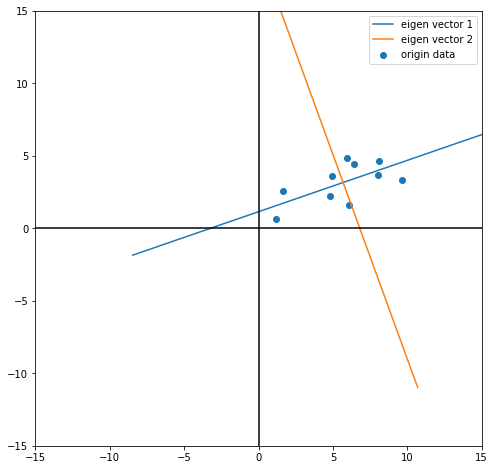

In [12]:
import matplotlib.pyplot as plt
#设置图大小
size = 15

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

如果用PCA把$m$个维度的数据降维成$k$个维度，即只用前$k$个主成分来表示，那么数据在主成分上的投影坐标是
$$Y_{n*k} = X_{n*m}Q_{m*k}$$
$Q$为特征向量组成的矩阵

In [34]:
#数据在主成分1上的投影坐标是Y
k=1
Q = vecs[:,:k]
Y = np.matmul(data_norm,Q)
Y

array([[-0.8144],
       [-1.1133],
       [ 1.1265],
       [ 0.561 ],
       [-3.8076],
       [-2.7876],
       [ 0.1097],
       [ 4.0022],
       [ 5.0746],
       [-2.3511]])

这个时候我们相当于只需要存储**前k个主成分的特征向量$Q_{m*k}$**和**数据在前k个主成分上的投影坐标$Y_{n*k}$**，就可以还原数据
$$Y_{n*k}{Q_{m*k}}^T=X_{n*m}$$
其中，由于$Q$已经正交化，${Q_{m*k}}^T{Q_{m*k}}=I_{k*k}$

In [35]:
#得到去中心化的还原数据
np.matmul(Y,Q.T)

array([[ 0.7676,  0.272 ],
       [ 1.0494,  0.3719],
       [-1.0618, -0.3763],
       [-0.5288, -0.1874],
       [ 3.5888,  1.2719],
       [ 2.6275,  0.9312],
       [-0.1034, -0.0366],
       [-3.7723, -1.3369],
       [-4.7831, -1.6952],
       [ 2.216 ,  0.7854]])

In [36]:
#加上均值，还原数据
data_ = np.matmul(Y,Q.T)+data.mean(0)
data_

array([[6.4527, 3.4356],
       [6.7345, 3.5355],
       [4.6233, 2.7873],
       [5.1563, 2.9761],
       [9.2739, 4.4355],
       [8.3125, 4.0947],
       [5.5817, 3.1269],
       [1.9128, 1.8266],
       [0.902 , 1.4684],
       [7.9011, 3.9489]])

# 降维重构的数据与原数据对比

## 用我们刚刚的方法

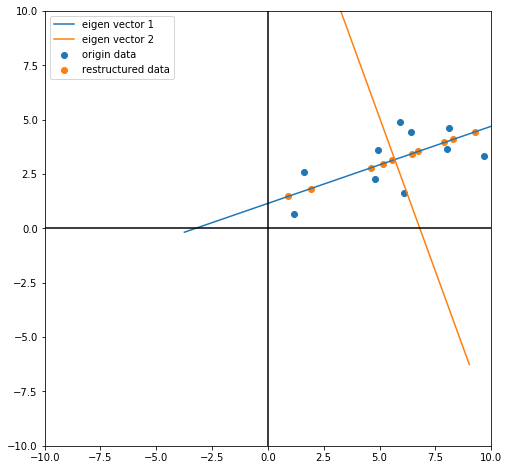

In [19]:

import matplotlib.pyplot as plt
#设置图大小
size = 10

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

plt.scatter(data_[:,0],data_[:,1],label='restructured data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

## 用sklearn的PCA

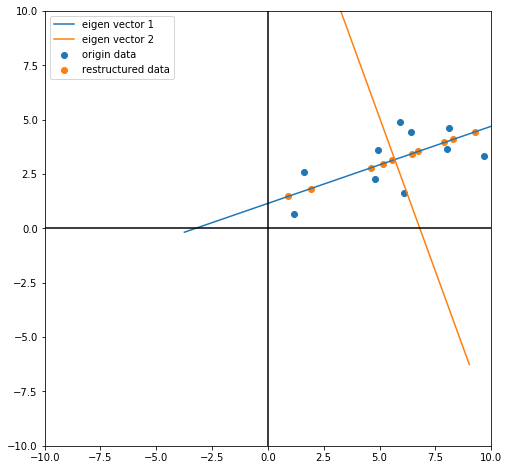

In [78]:

import matplotlib.pyplot as plt

#sklearn PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca.fit(data)
Y = pca.fit_transform(data)
vecs = pca.components_.T
data_ = np.dot(Y[:,:1],vecs[:,:1].T)+data.mean(0)


#设置图大小
size = 10

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

plt.scatter(data_[:,0],data_[:,1],label='restructured data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()


## 用SVD

In [37]:
#用SVD主要是想用SVD求出主成分的方向向量
U,vals,V = np.linalg.svd(data_norm)
vecs = V.T

#数据在主成分1上的投影坐标是Y
Y = np.matmul(data_norm,vecs[:,:1])
#得到去中心化的还原数据
data_ = np.matmul(Y,vecs[:,:1].T)+data.mean(0)


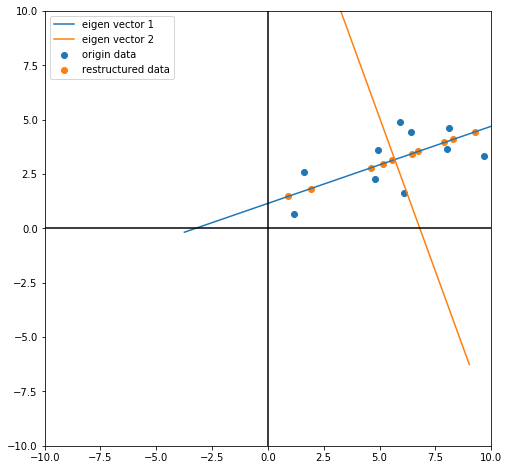

In [38]:
#画图
import matplotlib.pyplot as plt
#设置图大小
size = 10

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

plt.scatter(data_[:,0],data_[:,1],label='restructured data')

#绘制主成分的向量
i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

# 三维数据的测试

In [39]:
# 计算以下数据的协方差矩阵
import numpy as np
np.random.seed(0)
data = np.random.uniform(-10,10,(20,3))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(20,1))
data[:,2:] = 0.5*data[:,0:1]+np.random.uniform(-3,3,(20,1))


data_normal = data-data.mean(0)


In [40]:
C = np.cov(data_normal.T)

#计算特征值和特征向量
vals, vecs = np.linalg.eig(C)
#重新排序，从大到小
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]

vals,vecs

(array([34.5686,  2.4069,  1.2623]), array([[-0.7952, -0.2741, -0.5409],
        [-0.3904, -0.4512,  0.8025],
        [-0.464 ,  0.8493,  0.2518]]))

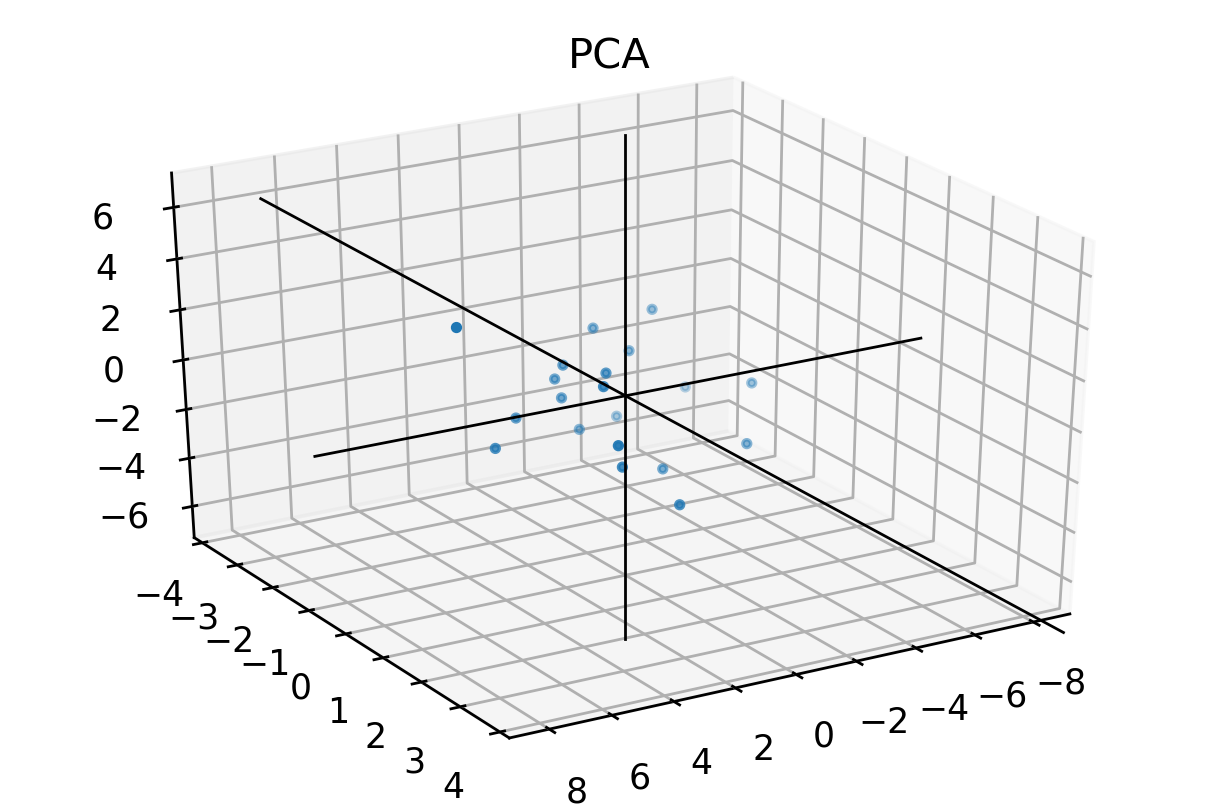

In [41]:
import matplotlib.pyplot as plt, mpld3
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


X = data[:,0]
Y = data[:,1]
Z = data[:,2]

for i in range(45,60):
    #让图转起来
    import IPython
    IPython.display.clear_output(wait=True)

    fig = plt.figure(1,(6,4),dpi = 250)
    ax = fig.gca(projection='3d')

    plt.cla()
    #绘制散点
    ax.scatter(X,Y,Z,s=5)

    #绘制xyz轴
    ax.plot([0,0],[0,0],[-10,10],c = 'black',linewidth = 0.8)
    ax.plot([0,0],[-10,10],[0,0],c = 'black',linewidth = 0.8)
    ax.plot([-10,10],[0,0],[0,0],c = 'black',linewidth = 0.8)
    
    
    ax.view_init(azim=i)
    plt.xlim(-X.max(), X.max())
    plt.ylim(-Y.max(), Y.max())
    ax.set_zlim(-Z.max(),Z.max())
    plt.title('PCA')
    plt.show()
    

In [42]:
#数据在主成分1上的投影坐标是
zcf = np.matmul(data_normal,vecs[:,:2])
data_ = np.matmul(zcf,vecs[:,:2].T)+data.mean(0)
data_

array([[ 0.466 , -0.119 , -0.3664],
       [ 0.3823, -0.3452,  0.1743],
       [-1.0858, -0.2398, -3.3149],
       [-2.5468, -2.293 ,  0.0896],
       [ 1.1163, -0.1704,  1.1939],
       [-8.3776, -4.4755, -5.4804],
       [ 6.336 ,  2.919 ,  2.5613],
       [ 5.1451,  2.6233,  0.9454],
       [-6.6908, -3.8655, -3.8009],
       [ 8.7146,  3.0963,  7.1057],
       [-3.7568, -1.861 , -3.8863],
       [ 1.6788,  0.0988,  1.5444],
       [ 2.99  ,  1.9181, -1.4365],
       [ 4.2061,  1.3924,  2.8509],
       [ 4.4044,  2.2631,  0.5024],
       [ 2.5662,  1.119 ,  0.1996],
       [-3.7324, -2.6537, -1.3076],
       [-2.0326, -0.9396, -3.1188],
       [-5.6263, -4.0178, -1.0289],
       [-5.7263, -2.817 , -5.0701]])

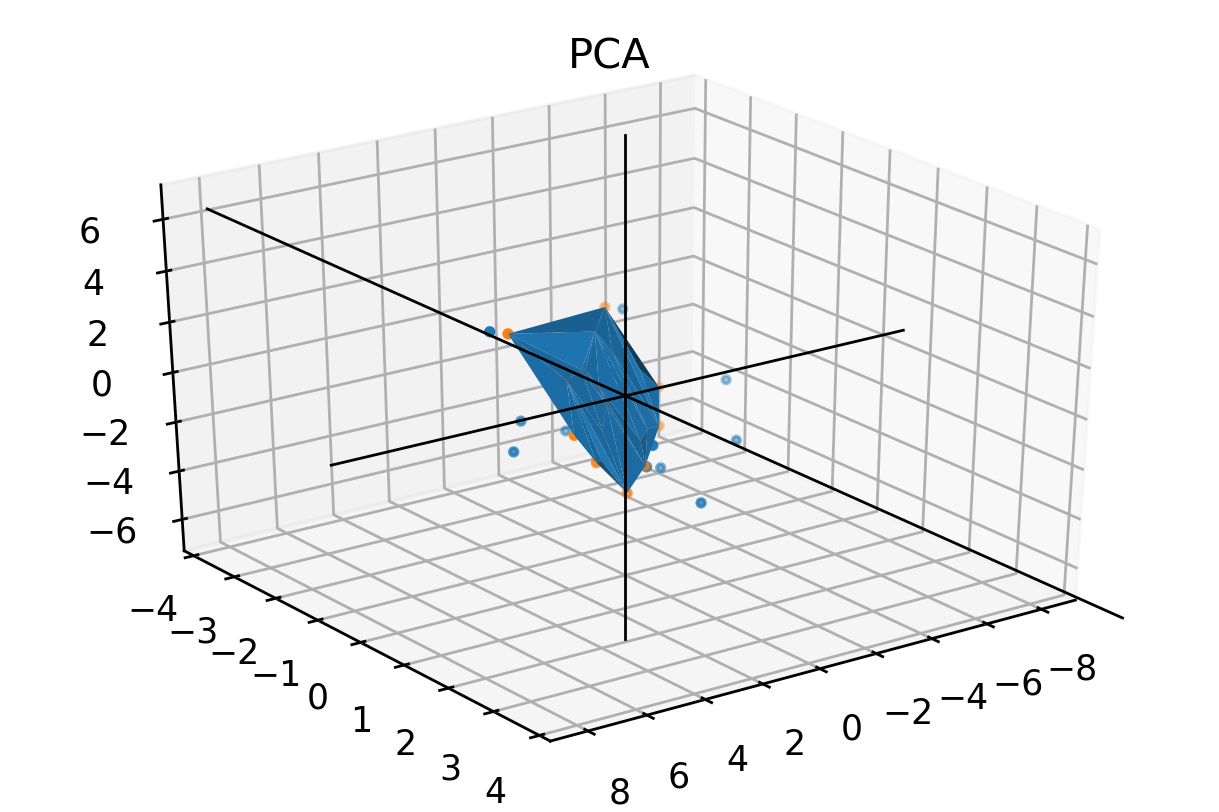

In [43]:
import matplotlib.pyplot as plt, mpld3
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


X = data[:,0]
Y = data[:,1]
Z = data[:,2]

X_ = data_[:,0]
Y_ = data_[:,1]
Z_ = data_[:,2]

for i in range(35,55):
    #让图转起来
    import IPython
    IPython.display.clear_output(wait=True)

    fig = plt.figure(1,(6,4),dpi = 250)
    ax = fig.gca(projection='3d')

    plt.cla()
    #绘制散点
    ax.scatter(X,Y,Z,s=5,label='origin data')
    
    ax.scatter(X_,Y_,Z_,s=5,label='restructured data')
    ax.plot_trisurf(X_, Y_, Z_)
    #绘制xyz轴
    ax.plot([0,0],[0,0],[-10,10],c = 'black',linewidth = 0.8)
    ax.plot([0,0],[-10,10],[0,0],c = 'black',linewidth = 0.8)
    ax.plot([-10,10],[0,0],[0,0],c = 'black',linewidth = 0.8)
    
    
    ax.view_init(azim=i)
    plt.xlim(-X.max(), X.max())
    plt.ylim(-Y.max(), Y.max())
    ax.set_zlim(-Z.max(),Z.max())
    plt.title('PCA')
    plt.show()
    

# 这关奇异值什么事？

## 奇异值分解  $Singular$ $Value$ $Decomposition$ $(SVD)$

奇异值分解是一个能适用于任意矩阵的一种分解的方法，对于任意矩阵A总是存在一个奇异值分解：

$$A=U\Sigma V^T$$

假设A是一个$m*n$的矩阵，那么得到的$U$是一个$m*m$的方阵，$U$里面的正交向量被称为左奇异向量。  
$Σ$是一个$m*n$的矩阵，$Σ$除了对角线其它元素都为0，对角线上的元素称为奇异值。  
$V^T$是$V$的转置矩阵，是一个$n*n$的矩阵，它里面的正交向量被称为右奇异值向量。  
而且一般来讲，我们会将$Σ$上的值按从大到小的顺序排列。


## SVD分解矩阵A的步骤：

1) 求的$AA^T$特征值和特征向量，用单位化的特征向量构成$U$。  
2) 求的$A^TA$特征值和特征向量，用单位化的特征向量构成$V$。  
3) 将$AA^T$或者$A^TA$的特征值求平方根，然后构成$Σ$。

## 我们自己实现

In [119]:
#求U
valsU,U = np.linalg.eig(np.dot(data_normal,data_normal.T))
#以特征值排序
U = U[:,np.argsort(-valsU)]
valsU = valsU[np.argsort(-valsU)]

#求V
valsV,V = np.linalg.eig(np.dot(data_normal.T,data_normal))
#以特征值排序
V = V[:,np.argsort(-valsV)]
valsV = valsV[np.argsort(-valsV)]
V = V.T

#求对角阵
vals = valsV**0.5
U,vals,V

(array([[ 0.0517+0.j    , -0.0538+0.j    , -0.9972+0.j    , ...,
          0.001 +0.0003j,  0.0074+0.j    , -0.0039+0.j    ],
        [ 0.0971+0.j    , -0.0215+0.j    ,  0.0062+0.j    , ...,
          0.1118+0.0374j, -0.0254+0.j    , -0.2994+0.j    ],
        [-0.0001+0.j    ,  0.0584+0.j    , -0.0032+0.j    , ...,
          0.0106-0.0014j,  0.0174+0.j    ,  0.0216+0.j    ],
        ...,
        [ 0.1066+0.j    , -0.0102+0.j    ,  0.0061+0.j    , ...,
         -0.3294-0.0294j,  0.0239+0.j    ,  0.0363+0.j    ],
        [ 0.3134+0.j    , -0.0641+0.j    ,  0.0197+0.j    , ...,
         -0.1346-0.219j , -0.0544+0.j    ,  0.1274+0.j    ],
        [-0.2501+0.j    ,  0.8836+0.j    , -0.0606+0.j    , ...,
         -0.1349-0.0627j,  0.0195+0.j    , -0.0194+0.j    ]]),
 array([14.4769, 10.2763]),
 array([[ 0.9276,  0.3736],
        [-0.3736,  0.9276]]))

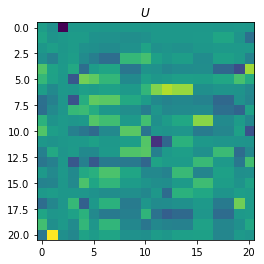

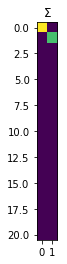

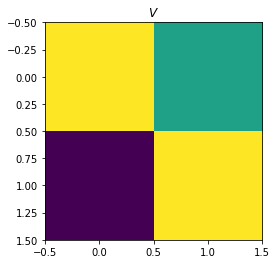

In [120]:
plt.imshow(np.real(U))
plt.title('$U$')
plt.show()

m,n = data_normal.shape
sigma = np.zeros((m,n))
for i in range(min([m,n])):
    sigma[i][i]=vals[i]

plt.imshow(sigma)
plt.title('$\Sigma$')
plt.show()

plt.imshow(np.real(V))
plt.title('$V$')
plt.show()

In [112]:
#重构矩阵
m,n = data_normal.shape
sigma = np.zeros((m,n))
for i in range(min([m,n])):
    sigma[i][i]=vals[i]
np.real(data_normal-np.dot(np.dot(U,sigma),V))

array([[-0., -0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-0., -0.],
       [ 0.,  0.],
       [ 0., -0.],
       [-0., -0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0., -0.],
       [ 0., -0.],
       [-0., -0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-0.,  0.],
       [ 0.,  0.],
       [ 0., -0.],
       [-0.,  0.],
       [-0., -0.],
       [ 0., -0.],
       [ 0.,  0.]])

## np自带的svd实现

In [113]:
U,vals,V = np.linalg.svd(data_normal)
U

array([[-0.0517,  0.0538,  0.0237, ..., -0.1021, -0.3141,  0.5868],
       [-0.0971,  0.0215, -0.0533, ..., -0.0327, -0.065 , -0.7091],
       [ 0.0001, -0.0584,  0.9966, ...,  0.0003,  0.0028, -0.0509],
       ...,
       [-0.1066,  0.0102,  0.0011, ...,  0.9894, -0.0319,  0.0405],
       [-0.3134,  0.0641,  0.0051, ..., -0.0314,  0.9046,  0.1488],
       [ 0.2501, -0.8836, -0.0528, ...,  0.0289,  0.1156,  0.1556]])

In [114]:
#重构矩阵
m,n = data_normal.shape
sigma = np.zeros((m,n))
for i in range(min([m,n])):
    sigma[i][i]=vals[i]
data_normal-np.dot(np.dot(U,sigma),V)

array([[-0., -0.],
       [ 0.,  0.],
       [-0.,  0.],
       [ 0., -0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0., -0.],
       [ 0.,  0.],
       [ 0., -0.],
       [ 0.,  0.],
       [-0., -0.],
       [-0., -0.],
       [ 0.,  0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-0., -0.],
       [ 0.,  0.]])

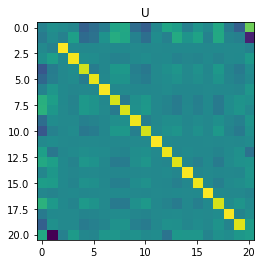

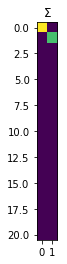

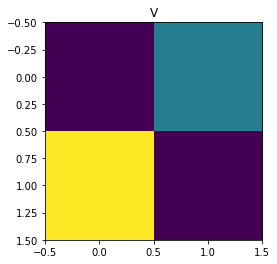

In [117]:
plt.imshow(np.real(U))
plt.title('U')
plt.show()

m,n = data_normal.shape
sigma = np.zeros((m,n))
for i in range(min([m,n])):
    sigma[i][i]=vals[i]

plt.imshow(sigma)
plt.title('$\Sigma$')
plt.show()

plt.imshow(np.real(V))
plt.title('V')
plt.show()

In [53]:
#重构矩阵
data_normal-np.dot(np.dot(U,sigma),V)

array([[-0., -0.],
       [ 0.,  0.],
       [-0.,  0.],
       [ 0., -0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0., -0.],
       [ 0.,  0.],
       [ 0., -0.],
       [ 0.,  0.],
       [-0., -0.],
       [-0., -0.],
       [ 0.,  0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-0., -0.],
       [ 0.,  0.]])

注意到：用我们自己的方法做SVD的时候，结果和np的SVD结果不一样，这是因为U矩阵和V矩阵的正负问题，如果两者都取负，则抵消，结果也不变


## 为什么要用SVD来做PCA

**很巧的是，SVD中的右奇异矩阵V，就是PCA的主成分**

在PCA降维中，我们需要找到样本协方差矩阵$C$的最大$k$个特征向量，然后用这最大的$k$个特征向量组成的矩阵来做低维投影降维。  
可以看出，在这个过程中需要先求出协方差矩阵,当样本数多、样本特征数也多的时候，这个计算量还是很大的。当我们用到SVD分解协方差矩阵的时候，SVD有两个好处：

1) 有一些SVD的实现算法可以先不求出协方差矩阵$C$也能求出我们的右奇异矩阵$V$。也就是说，我们的PCA算法可以不用做特征分解而是通过SVD来完成，这个方法在样本量很大的时候很有效。实际上，scikit-learn的PCA算法的背后真正的实现就是用的SVD，而不是特征值分解。

2) 注意到PCA仅仅使用了我们SVD的右奇异矩阵$V$，没有使用到左奇异值矩阵$U$，那么左奇异值矩阵$U$有什么用呢？（写下你的想法）



# PCA的缺陷
如果加入异常值，PCA的结果会发生什么变化？

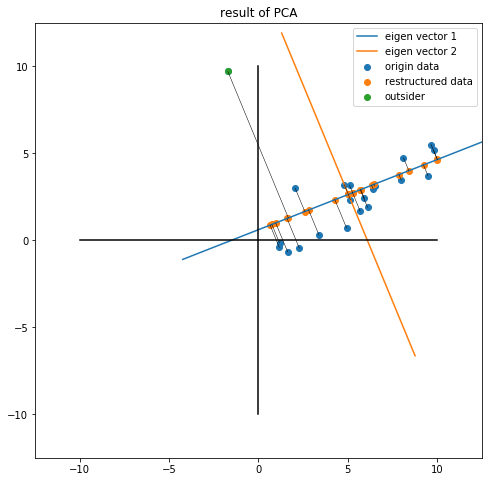

In [237]:


import numpy as np

for i in range(0,720,10):
    
    np.random.seed(0)
    data = np.random.uniform(1,10,(20,2))
    data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(20,1))
    


    #如果我们在数据中加入异常值,定义一个角度放入异常值
    i = 2*i/360*np.pi
    data_outsider=[np.sin(i)*5*i/(2*np.pi),np.cos(i)*5*i/(2*np.pi)]
    data = np.vstack((data,data_outsider))
    
    #去中心化
    data_normal = data-data.mean(0)
    X = data_normal[:,0]
    Y = data_normal[:,1]
    
    #协方差矩阵
    C = np.cov(data_normal.T)
    
    #计算特征值和特征向量
    vals, vecs = np.linalg.eig(C)
    
    #重新排序，从大到小
    vecs = vecs[:,np.argsort(-vals)]
    vals = vals[np.argsort(-vals)]

    #数据在主成分1上的投影坐标是
    zcf1 = np.matmul(data_normal,vecs[:,0])
    
    #只用主成分1重构数据
    data_ = np.matmul(zcf1.reshape(len(data),1),vecs[:,0].reshape(1,2))+data.mean(0)

    import matplotlib.pyplot as plt
    #设置图大小
    size = 10
    
    #让图转起来，每次绘图都清空掉上一次绘制结果
    import IPython
    IPython.display.clear_output(wait=True)
          
    plt.figure(1,(8,8))

    plt.scatter(data[:,0],data[:,1],label='origin data')
    plt.scatter(data_[:,0],data_[:,1],label='restructured data')
    plt.scatter(data[-1,0],data[-1,1],label='outsider')

    i=0
    
    #绘制两个主成分的方向
    ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
    ev = (ev+data.mean(0))
    plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

    i=1
    ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
    ev = (ev+data.mean(0))
    plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))
    
    #绘制一下原始数据和重构数据的连线
    for j in range(len(data)):
        plt.plot([data[j,0],data_[j,0]],[data[j,1],data_[j,1]],c='black',linewidth = 0.5)
        

    #画一下x轴y轴
    plt.plot([-size,size],[0,0],c='black')
    plt.plot([0,0],[-size,size],c='black')
    plt.xlim(-12.5,12.5)
    plt.ylim(-12.5,12.5)
    plt.title('result of PCA')
    plt.legend()
    plt.show()

# Stable Principle Component Pursuit (SPCP)
 Stable Principle Component Pursuit (SPCP)是PCA的改进版本，它把问题变成：
$$\min_{L,S}{{ \left\Vert {L} \right\Vert }_*+\lambda{ \left\Vert {S} \right\Vert }_1}$$
$$s.t. M=L+S$$
其中：
$M$为原始矩阵  
$L$为低秩矩阵，${ \left\Vert {L} \right\Vert }_*$为$L$矩阵核范数Nuclear Norm,为矩阵奇异值的和(用于表示低秩矩阵)  
$S$为稀疏矩阵，${ \left\Vert {S} \right\Vert }_1$为矩阵L1范数（列模）:表示矩阵中非零元素的绝对值之和  
$\lambda=1/\sqrt{max(m,n)}$  

即，把原始矩阵分解为低秩矩阵与稀疏矩阵的和，这样子稀疏矩阵代表的就是矩阵的异常值

为了方便求解，引入拉格朗日乘数，把问题变成：
$$\min_{L,S}{{ \left\Vert {L} \right\Vert }_*+\lambda{ \left\Vert {S} \right\Vert }_1}+\mu{{ \left\Vert {N} \right\Vert }_F}$$
其中:噪声矩阵$N=M-L-S$  
建议的$\mu$取值为$\mu=\sqrt{2max(m,n)}\delta$，$\delta={ \left\Vert {N} \right\Vert }_F$ ，这样子的取值足够大能够排除数据噪声，也足够小不会导致原始矩阵被过分缩小

## 用pytorch实现spcp

In [5]:
m,n = data.shape
m,n

(21, 2)

spcp的代码

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

LR = 0.01

L = torch.zeros([m,n],dtype=torch.float ,requires_grad=True)
S = torch.zeros([m,n],dtype=torch.float ,requires_grad=True)
M =  torch.tensor(data,dtype=torch.float ,requires_grad=False)

lambda1 = 1/(max(m,n)**0.5)
mu = 1/20 * torch.norm(M,p = 'nuc')

optimizer = torch.optim.Adam([L,S],lr = LR,betas = (0.9,0.99))    

t = 1
steps = []
losses = []
N = M-L-S
while torch.norm(N) > mu:
    steps.append(t)
    
    N = M-L-S
    loss = torch.norm(L,p = 'nuc')+lambda1 * torch.norm(S,p =1) + mu * torch.norm(N)
    losses.append(loss)
    
    
    optimizer.zero_grad()      #初始化梯度
    loss.backward()         #计算梯度
    optimizer.step()   
    '''
    if t%10 == 0:
        import IPython
        IPython.display.clear_output(wait=True)

        plt.plot(steps,losses,label = 'loss')
        plt.plot(steps,losses,label = 'loss')
        plt.show()
    '''
    t+=1
dataL = L.data.numpy()
dataS = S.data.numpy()
dataN = N.data.numpy()
data_ = dataL+dataS

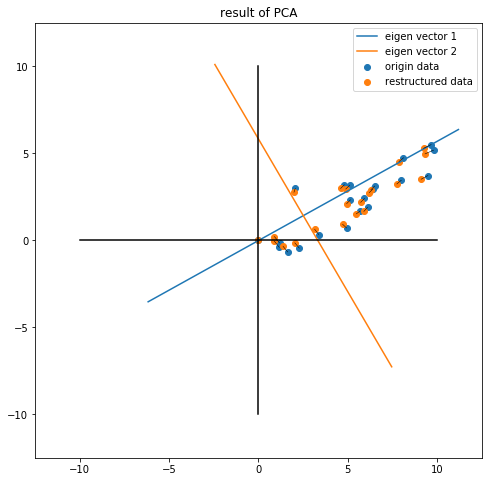

In [8]:


import numpy as np



import matplotlib.pyplot as plt


#设置图大小
size = 10

#让图转起来，每次绘图都清空掉上一次绘制结果
import IPython
IPython.display.clear_output(wait=True)

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')
plt.scatter(data_[:,0],data_[:,1],label='restructured data')

vals,vecs = np.linalg.eig(np.cov(dataL.T))
vecs
i=0
#绘制两个主成分的方向
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+dataL.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+dataL.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))


#绘制一下原始数据和重构数据的连线
for j in range(len(data)):
    plt.plot([data[j,0],data_[j,0]],[data[j,1],data_[j,1]],c='black',linewidth = 0.5)


#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-12.5,12.5)
plt.ylim(-12.5,12.5)
plt.title('result of PCA')
plt.legend()
plt.show()

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt


def spcp(data):
    LR = 0.01

    L = torch.zeros([m,n],dtype=torch.float ,requires_grad=True)
    S = torch.zeros([m,n],dtype=torch.float ,requires_grad=True)
    M =  torch.tensor(data,dtype=torch.float ,requires_grad=False)
    N = M-L-S
    lambda1 = 1/(max(m,n)**0.5)
    mu = 1/20 * torch.norm(M,p = 'nuc')

    optimizer = torch.optim.Adam([L,S],lr = LR,betas = (0.9,0.99))    

    t = 1
    steps = []
    losses = []
    while torch.norm(N) > mu:
        steps.append(t)

        N = M-L-S
        loss = torch.norm(L,p = 'nuc')+lambda1 * torch.norm(S,p =1) + mu * torch.norm(N)
        losses.append(loss)


        optimizer.zero_grad()      #初始化梯度
        loss.backward()         #计算梯度
        optimizer.step()   
        '''
        if t%10 == 0:
            import IPython
            IPython.display.clear_output(wait=True)

            plt.plot(steps,losses,label = 'loss')
            plt.plot(steps,losses,label = 'loss')
            plt.show()
        '''
        t+=1
    dataL = L.data.numpy()
    dataS = S.data.numpy()
    dataN = N.data.numpy()
    return dataL,dataS,dataN
dataL,dataS,dataN = spcp(data)


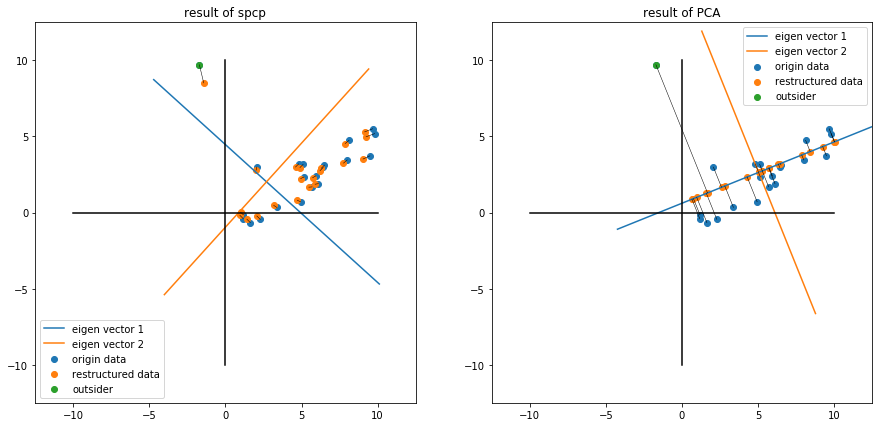

In [23]:
# 观察异常值对spcp的影响
for i in range(0,720,10):
    import matplotlib.pyplot as plt
    #设置图大小
    size = 10

    #让图转起来，每次绘图都清空掉上一次绘制结果
    import IPython
    IPython.display.clear_output(wait=True)

    plt.figure(1,(15,7))
    ax1=plt.subplot(121)
    ax2=plt.subplot(122)
    
    
    #造数据
    np.random.seed(0)
    data = np.random.uniform(1,10,(20,2))
    data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(20,1))
    


    #如果我们在数据中加入异常值,定义一个角度放入异常值
    i = 2*i/360*np.pi
    data_outsider=[np.sin(i)*5*i/(2*np.pi),np.cos(i)*5*i/(2*np.pi)]
    data = np.vstack((data,data_outsider))
    
    
    #SPCP
    dataL,dataS,dataN = spcp(data)
    data_ = dataL+dataS
    

    import numpy as np





    
    plt.sca(ax1)
    plt.scatter(data[:,0],data[:,1],label='origin data')
    plt.scatter(data_[:,0],data_[:,1],label='restructured data')
    plt.scatter(data[-1,0],data[-1,1],label='outsider')
    
    vals,vecs = np.linalg.eig(np.cov(dataL.T))
    vecs
    i=0
    #绘制两个主成分的方向
    ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
    ev = (ev+dataL.mean(0))
    plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

    i=1
    ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
    ev = (ev+dataL.mean(0))
    plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

    #绘制一下原始数据和重构数据的连线
    for j in range(len(data)):
        plt.plot([data[j,0],data_[j,0]],[data[j,1],data_[j,1]],c='black',linewidth = 0.5)


    #画一下x轴y轴
    plt.plot([-size,size],[0,0],c='black')
    plt.plot([0,0],[-size,size],c='black')
    plt.xlim(-12.5,12.5)
    plt.ylim(-12.5,12.5)
    plt.title('result of spcp')
    plt.legend()
    
    
    #PCA
    plt.sca(ax2)
    #去中心化
    data_normal = data-data.mean(0)
    X = data_normal[:,0]
    Y = data_normal[:,1]
    
    #协方差矩阵
    C = np.cov(data_normal.T)
    
    #计算特征值和特征向量
    vals, vecs = np.linalg.eig(C)
    


    #数据在主成分1上的投影坐标是
    zcf1 = np.matmul(data_normal,vecs[:,0])
    
    #只用主成分1重构数据
    data_ = np.matmul(zcf1.reshape(len(data),1),vecs[:,0].reshape(1,2))+data.mean(0)

    plt.scatter(data[:,0],data[:,1],label='origin data')
    plt.scatter(data_[:,0],data_[:,1],label='restructured data')
    plt.scatter(data[-1,0],data[-1,1],label='outsider')
    
    i=0
    #绘制两个主成分的方向
    ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
    ev = (ev+data.mean(0))
    plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

    i=1
    ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
    ev = (ev+data.mean(0))
    plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

    #绘制一下原始数据和重构数据的连线
    for j in range(len(data)):
        plt.plot([data[j,0],data_[j,0]],[data[j,1],data_[j,1]],c='black',linewidth = 0.5)


    #画一下x轴y轴
    plt.plot([-size,size],[0,0],c='black')
    plt.plot([0,0],[-size,size],c='black')
    plt.xlim(-12.5,12.5)
    plt.ylim(-12.5,12.5)
    plt.title('result of PCA')
    plt.legend()
    #
    
    plt.show()

In [21]:
data.mean(0)

array([5.1212, 2.185 ])